<a href="https://colab.research.google.com/github/lifepopkay/Tech-Monies/blob/Modelling/Second_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://raw.githubusercontent.com/lifepopkay/Tech-Monies/Modelling/Mergered%20Cleaned%20Data.csv'
#https://github.com/lifepopkay/Tech-Monies/blob/Modelling/Mergered%20Cleaned%20Data.csv
df = pd.read_csv(url)

In [3]:
df.head(2)

,Unnamed: 0,id,company,location,postDate,title scraped for,Country,upper_salary,lower_salary,payment_frequency,State,age,Position,year_of_exp,contract_type,eligibility,title_cleaned,skills_list
0,0,job_3e1d31dda6c5cb4b,Offerzen,Lagos,Just posted,Data Scientist,Nigeria,NaN,NaN,NaN,Lagos,NaN,Senior Level,2.0,Full-time,NaN,Senior Software Engineer,"['asp', 'D', 'C', 'R', 'AWS']"
1,1,job_c3e2ed6ba483528b,GVA Partners,Lagos,Today,Data Scientist,Nigeria,NaN,NaN,NaN,Lagos,NaN,NaN,4.0,NaN,undergraduate,Data Scientist,"['asp', 'Prescriptive Analytics', 'Go', 'Flask..."


In [4]:
# Standardizing the title 
ML=['Machine Learning', 'Machine Learning ']
for title in ML:
    df['title scraped for'].replace(title,'Machine Learning Engineer', inplace = True)

In [5]:
# Dropping records with missing values for lower salary range
#df.dropna(subset=["lower_salary"], inplace = True)

In [6]:
df.shape

(9709, 18)

In [7]:
# Columns to drop
columns_to_drop = ["company", "location", "State", "age", "Unnamed: 0", "id","postDate"]

In [8]:
# Drop unnecessary columns
df.drop(columns_to_drop, axis="columns", inplace = True)

In [9]:
# Selecting Job posting with years of experience less than 20 which is the 95th percentile of the Years of experience
df = df.query("year_of_exp <= 30 ")

In [10]:
# Replace "hs" with "high school diploma" in eligibility
df.eligibility.replace("hs",'high school diploma', inplace = True)

# Fill missing values for eligibility with "high school diploma"
df.eligibility.fillna('high school diploma', inplace = True)

In [11]:
# Fill missing values for contract_type with the mode of contract_type
df.contract_type.fillna(df.contract_type.mode()[0], inplace = True)

In [12]:
# Creating an exchange rate for each country currency with respect to UD dollars
Exchange_rate = {"Nigeria": 427.88,
"India": 79.97,
"USA": 1,
"UK": 1.17}
df["Exchange_rate"] = df.Country.map(Exchange_rate)

# Converting the salary currency for each Job to US dollars
df.upper_salary = df.upper_salary / df.Exchange_rate
df.lower_salary = df.lower_salary / df.Exchange_rate

df.drop('Exchange_rate', axis= "columns", inplace = True)

On exploring the salary for missing Payment frequency, it was discovered that the salary far exceeds the salary for hourly payment frequency and is far below the salary for minthly payment frequency. 

So the the missing values for payment frequency will be filled with "Weekly"

In [13]:
# Filling the missing values for payment frequency with "Weekly"
df.payment_frequency.fillna("Weekly", inplace = True)

In [14]:
# Defining a function that cleans the skills column
def convert_skill_list_to_list(skills):
    skills = skills.replace("[", "")
    skills = skills.replace("]","")
    skills = skills.replace("'", "")
    Skills_list = skills.split(",")
    Skills_lists = []
    for skill in Skills_list:
        skill = skill.strip()
        Skills_lists.append(skill)
    return Skills_lists

In [15]:
#convert_skill_list_to_list(df.skills_list)

In [16]:
df.skills_list = df.skills_list.apply(convert_skill_list_to_list)

In [17]:
# Defining a function that counts the number of job posting that require a particular skill
def Skills_table(df):
    list_skill = {}
    for Skill_list in df.skills_list:
        for Skill in Skill_list:
            if Skill in list_skill:
                list_skill[Skill] += 1
            else:
                list_skill[Skill] = 1
    skill_df = pd.DataFrame(list_skill, index = ["Number of jobs"]).T.sort_values("Number of jobs", ascending = False)
    return skill_df

In [18]:
# Selecting the Job postings for data analyst roles
DA_df = df[df["title scraped for"] == "Data Analyst"]

# Selecting the Job postings for data scientist roles
DS_df = df[df["title scraped for"] == "Data Scientist"]

# Selecting the Job postings for business analyst roles
BA_df = df[df["title scraped for"] == "Business Analyst"]

# Selecting the Job postings for machine learning engineering roles
ML_df = df[df["title scraped for"] == "Machine Learning Engineer"]

# Selecting the Job postings for web developer roles
WD_df = df[df["title scraped for"] == "Web Developer"]

In [19]:
# Selecting the Skills required for Data analyst roles
DASkills_df = Skills_table(DA_df)

# Saving the top 10 skills for Data Analyst to a list
DAT10_skills = list(DASkills_df.head(10).index)

In [20]:
# Selecting the Skills required for Data scientist roles
DSSkills_df = Skills_table(DS_df)

# Saving the top 10 skills for Data Scientist to a list
DST10_skills = list(DSSkills_df.head(10).index)

In [21]:
# Selecting the Skills required for Business analyst roles
BASkills_df = Skills_table(BA_df)

# Saving the top 10 skills for Business Analyst to a list
BAT10_skills = list(BASkills_df.head(10).index)

In [22]:
# Selecting the Skills required for Machine learning roles
MLSkills_df = Skills_table(ML_df)

# Saving the top 10 skills for Machine learning to a list
MLT10_skills = list(MLSkills_df.head(10).index)

In [23]:
# Selecting the Skills required for Web developer roles
WDSkills_df = Skills_table(WD_df)

# Saving the top 10 skills for Web developer to a list
WDT10_skills = list(WDSkills_df.head(10).index)

In [24]:
# Merging the top 10 skills for each role into a set
Most_popular_skills = set(DAT10_skills + DST10_skills + BAT10_skills + MLT10_skills + WDT10_skills)

len(list(Most_popular_skills))

19

In [25]:
# Dropping missing values for title scraped for
df.dropna(subset = ["title scraped for"], inplace = True)

In [26]:
# Determining the average years of experience for each role and position
df.groupby(["title scraped for","Position"])[["year_of_exp"]].agg(np.mean)

year_of_exp
title scraped for         Position                 
Business Analyst          Mid-Level        5.000000
                          Senior Level     5.689119
Data Analyst              Entry Level      2.000000
                          Mid-Level        4.050000
                          Senior Level     5.368984
Data Scientist            Entry Level      1.666667
                          Mid-Level        3.740000
                          Senior Level     4.610667
Machine Learning Engineer Entry Level      2.750000
                          Mid-Level        4.211538
                          Senior Level     5.178808
Web Developer             Entry Level      3.333333
                          Mid-Level        2.964912
                          Senior Level     4.243636

In [27]:
# Defining a function that determines the Position based on years of expereience
def Position_based_on_yoe(data):
    data.reset_index(drop=True, inplace = True)
    for i in range(data.shape[0]):
        if data.loc[i,"title scraped for"] == 'Business Analyst':
            if  data.loc[i,"year_of_exp"] >= 3 and data.loc[i,"year_of_exp"] <= 5:
                    data.loc[i,"Position"] = "Mid-Level"
            elif data.loc[i,"year_of_exp"] > 5:
                    data.loc[i,"Position"] = "Senior Level"
            else:
                data.loc[i,"Position"] = "Entry Level"
                
        elif data.loc[i,"title scraped for"] == 'Data Analyst':
            if  data.loc[i,"year_of_exp"] >= 3 and data.loc[i,"year_of_exp"] <= 5:
                    data.loc[i,"Position"] = "Mid-Level"
            elif data.loc[i,"year_of_exp"] > 5:
                    data.loc[i,"Position"] = "Senior Level"
            else:
                data.loc[i,"Position"] = "Entry Level"
                
        elif data.loc[i,"title scraped for"]== 'Data Scientist':
            if  data.loc[i,"year_of_exp"] >= 2 and data.loc[i,"year_of_exp"] <= 4:
                    data.loc[i,"Position"] = "Mid-Level"
            elif data.loc[i,"year_of_exp"] > 4:
                    data.loc[i,"Position"] = "Senior Level"
            else:
                data.loc[i,"Position"] = "Entry Level"
                
        elif data.loc[i,"title scraped for"] == 'Machine Learning Engineer':
            if  data.loc[i,"year_of_exp"] >= 3 and data.loc[i,"year_of_exp"] <= 5:
                    data.loc[i,"Position"] = "Mid-Level"
            elif data.loc[i,"year_of_exp"] > 5:
                    data.loc[i,"Position"] = "Senior Level"
            else:
                data.loc[i,"Position"] = "Entry Level"
                
        elif data.loc[i,"title scraped for"] == 'Web Developer':
            if  data.loc[i,"year_of_exp"] >= 2 and data.loc[i,"year_of_exp"] <= 4:
                    data.loc[i,"Position"] = "Mid-Level"
            elif data.loc[i,"year_of_exp"] > 4:
                    data.loc[i,"Position"] = "Senior Level"
            else:
                data.loc[i,"Position"] = "Entry Level"
                
    return data

In [28]:
data = df.copy()
df = Position_based_on_yoe(data)

In [29]:
# Defining a function that counts the number of recors we have for each level for each role for each country
def number_of_observations(data):
    return data.groupby(["Country","title scraped for","Position"]).agg({"Position":"count"})

number_of_observations(df)

Position
Country title scraped for         Position              
India   Business Analyst          Entry Level        126
                                  Mid-Level          220
                                  Senior Level       152
        Data Analyst              Entry Level        134
                                  Mid-Level          256
                                  Senior Level       125
        Data Scientist            Entry Level         72
                                  Mid-Level          229
                                  Senior Level       239
        Machine Learning Engineer Entry Level        281
                                  Mid-Level          470
                                  Senior Level       343
        Web Developer             Entry Level        260
                                  Mid-Level          255
                                  Senior Level        92
Nigeria Business Analyst          Entry Level         45
                                  Mid-Level           88
                                  Senior Level        28
        Data Analyst              Entry Level         31
                                  Mid-Level           80
                                  Senior Level        21
        Data Scientist            Mid-Level           14
                                  Senior Level        35
        Machine Learning Engineer Entry Level         12
                                  Mid-Level           41
                                  Senior Level         3
        Web Developer             Entry Level         17
                                  Mid-Level          103
                                  Senior Level        39
UK      Data Scientist            Entry Level         37
                                  Mid-Level          257
                                  Senior Level       158
        Web Developer             Entry Level         31
                                  Mid-Level          157
                                  Senior Level        73
USA     Business Analyst          Entry Level         46
                                  Mid-Level          107
                                  Senior Level        31
        Data Analyst              Entry Level         69
                                  Mid-Level          105
                                  Senior Level        21
        Data Scientist            Entry Level         27
                                  Mid-Level          110
                                  Senior Level        67
        Machine Learning Engineer Entry Level        136
                                  Mid-Level          186
                                  Senior Level        86
        Web Developer             Entry Level         30
                                  Mid-Level           95
                                  Senior Level        80

In [30]:
Frequency_to_yearly = {"Hourly": 40 * 52,
"Weekly": 52,
"Monthly": 12,
"Yearly": 1}
df["Frequency_to_yearly"] = df.payment_frequency.map(Frequency_to_yearly)

# Standardizing the payment frequency to Yearly
df.upper_salary = df.upper_salary * df["Frequency_to_yearly"]
df.lower_salary = df.lower_salary * df["Frequency_to_yearly"]
df.drop('Frequency_to_yearly', axis= "columns", inplace = True)

In [31]:
df.drop(['title_cleaned','payment_frequency'], axis="columns", inplace = True)

In [32]:
# Determining the average upper and lower salary for each level for each title for each country
df.groupby(["Country", "title scraped for", "Position"])[["lower_salary","upper_salary"]].agg(np.mean)

lower_salary   upper_salary
Country title scraped for         Position                                  
India   Business Analyst          Entry Level     4296.524611    7709.294294
                                  Mid-Level       9087.990233   18011.989496
                                  Senior Level   13634.612980   19514.067775
        Data Analyst              Entry Level     4386.923475    7806.385459
                                  Mid-Level      11127.802787   22789.770027
                                  Senior Level   14523.446292   21785.169439
        Data Scientist            Entry Level     7933.143679   16811.033867
                                  Mid-Level       8776.439849   17037.120906
                                  Senior Level   15226.298097   27461.858774
        Machine Learning Engineer Entry Level     8970.567232   12734.522380
                                  Mid-Level      14449.241338   23367.240600
                                  Senior Level   14614.855571   25660.664416
        Web Developer             Entry Level     3458.627573    6711.643734
                                  Mid-Level       7028.348571   10871.743073
                                  Senior Level   10880.716138   17601.337344
Nigeria Business Analyst          Entry Level     3505.655791            NaN
                                  Mid-Level       9611.870788   12129.569038
                                  Senior Level    5609.049266            NaN
        Data Analyst              Entry Level     2804.524633            NaN
                                  Mid-Level       8344.539447   12028.294537
                                  Senior Level    5609.049266            NaN
        Data Scientist            Mid-Level      19631.672432            NaN
                                  Senior Level    5609.049266            NaN
        Machine Learning Engineer Entry Level     4206.786950    7011.311583
                                  Mid-Level       4206.786950            NaN
                                  Senior Level            NaN            NaN
        Web Developer             Entry Level     2827.895672    5609.049266
                                  Mid-Level       7982.108571   10817.452156
                                  Senior Level    9924.901063   26269.047396
UK      Data Scientist            Entry Level    58355.555556   71088.267288
                                  Mid-Level      55951.873767   63854.585799
                                  Senior Level   55477.113010   79409.879336
        Web Developer             Entry Level    90250.164366   37519.073324
                                  Mid-Level      57332.152292   66427.138462
                                  Senior Level   42339.560440   56769.364316
USA     Business Analyst          Entry Level    74368.571429   94773.142857
                                  Mid-Level      78630.069841  102511.383051
                                  Senior Level   91586.368421  118753.333333
        Data Analyst              Entry Level    70881.907407   87265.692308
                                  Mid-Level      76068.107042   98439.011765
                                  Senior Level   91680.000000  122120.000000
        Data Scientist            Entry Level    96342.826087  127404.818182
                                  Mid-Level     109335.487671  133120.858824
                                  Senior Level  114438.342857  142101.063830
        Machine Learning Engineer Entry Level    99441.114286  129301.657534
                                  Mid-Level     110581.798507  140112.110236
                                  Senior Level  117711.471429  151402.974545
        Web Developer             Entry Level    82335.316667  106349.669565
                                  Mid-Level      91162.082667  115902.832877
                                  Senior Level  102545.714286  128623.333333

In [33]:
# Populating the each skills with 1 if a particular role required the skill and 0 if otherwise
i = 0
for skills_list in df.skills_list:
        for skill in skills_list:
            if skill in Most_popular_skills:
            #skill = skill.strip()
                df.loc[i, skill] = 1
        i +=1

In [34]:
# Dropping the skills list column
df.drop(["skills_list"], axis="columns", inplace = True)

In [35]:
# Adding the most popular skills to the dataframe
for Skill in list(Most_popular_skills):
    df[Skill] = 0

In [36]:
df.head()

,title scraped for,Country,upper_salary,lower_salary,Position,year_of_exp,contract_type,eligibility,D,C,...,Excel,Machine Learning,ML,Vi,Java,BA,HTML,CSS,client,PowerPoint
0,Data Scientist,Nigeria,NaN,NaN,Mid-Level,2.0,Full-time,high school diploma,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Data Scientist,Nigeria,NaN,NaN,Mid-Level,4.0,Full-time,undergraduate,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Data Scientist,Nigeria,NaN,19631.672432,Mid-Level,3.0,Full-time,undergraduate,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Data Scientist,Nigeria,NaN,NaN,Mid-Level,2.0,Full-time,undergraduate,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Data Scientist,Nigeria,NaN,NaN,Mid-Level,3.0,Full-time,high school diploma,0,0,...,0,0,0,0,0,0,0,0,0,0


### Categorical Column Coding map

In [37]:
# Encoding the categorical variables
df6 = df.copy()
categorical_columns = ["title scraped for",'Country','Position','contract_type','eligibility']
df[categorical_columns] = df[categorical_columns].astype('category')
df6 = df.copy()
for x in categorical_columns:
        df[x] = df[x].cat.codes
   

In [38]:
# Saving the codes for Variable
Title_scrapped_for  = dict(enumerate(df6['title scraped for'].cat.categories))
COUNTRY  = dict(enumerate(df6['Country'].cat.categories))
POSITION = dict(enumerate(df6['Position'].cat.categories))
#PAYMENT_FREQUENCY = dict(enumerate(df6['payment_frequency'].cat.categories))
CONTRACT_TYPE = dict(enumerate(df6['contract_type'].cat.categories))
ELIGIBILTY = dict(enumerate(df6['eligibility'].cat.categories))

In [39]:
Title_scrapped_for

{0: 'Business Analyst',
 1: 'Data Analyst',
 2: 'Data Scientist',
 3: 'Machine Learning Engineer',
 4: 'Web Developer'}

In [40]:
COUNTRY

{0: 'India', 1: 'Nigeria', 2: 'UK', 3: 'USA'}

In [41]:
POSITION

{0: 'Entry Level', 1: 'Mid-Level', 2: 'Senior Level'}

In [42]:
CONTRACT_TYPE

{0: 'Contract', 1: 'Full-time'}

In [43]:
ELIGIBILTY

{0: 'doctorate',
 1: 'high school diploma',
 2: 'postgraduate',
 3: 'undergraduate'}

In [44]:
df.shape

(5720, 27)

In [45]:
df.Country.value_counts()

0    3254
3    1196
2     713
1     557
Name: Country, dtype: int64

In [46]:
df1 = df.copy()

In [47]:
USA_JOBS = df.query("Country == 0 or Country == 3 ")

In [48]:
USA_JOBS.head()

,title scraped for,Country,upper_salary,lower_salary,Position,year_of_exp,contract_type,eligibility,D,C,...,Excel,Machine Learning,ML,Vi,Java,BA,HTML,CSS,client,PowerPoint
361,3,0,NaN,NaN,2,8.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
362,3,0,NaN,NaN,2,7.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
363,3,0,NaN,NaN,1,4.0,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0
364,3,0,NaN,NaN,2,8.0,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
365,3,0,NaN,NaN,2,6.0,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
USA_JOBS.shape

(4450, 27)

In [50]:
USA_JOBS.isna().sum()

title scraped for       0
Country                 0
upper_salary         3072
lower_salary         2892
Position                0
year_of_exp             0
contract_type           0
eligibility             0
D                       0
C                       0
R                       0
AWS                     0
Go                      0
Statistics              0
SQL                     0
Tableau                 0
Python                  0
Excel                   0
Machine Learning        0
ML                      0
Vi                      0
Java                    0
BA                      0
HTML                    0
CSS                     0
client                  0
PowerPoint              0
dtype: int64

In [51]:
df_test = USA_JOBS[USA_JOBS.lower_salary.isna()]

In [52]:
df_test.shape

(2892, 27)

In [53]:
USA_JOBS.dropna(subset=["upper_salary"], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [54]:
USA_JOBS.shape

(1378, 27)

In [55]:
# Fill the missing values for upper salary using an iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute       import IterativeImputer
#from catboost             import CatBoostRegressor

imputer = IterativeImputer(
                            verbose   = 2,
                            max_iter  = 20,
                            imputation_order = 'descending' )


df2 = pd.DataFrame(imputer.fit_transform(USA_JOBS), columns = USA_JOBS.columns) # preserve the column nam

[IterativeImputer] Completing matrix with shape (1378, 27)
[IterativeImputer] Ending imputation round 1/20, elapsed time 0.15
[IterativeImputer] Change: 0.0, scaled tolerance: 286.0 
[IterativeImputer] Early stopping criterion reached.


### Features

In [56]:
# Saving all the features used in developing the model to a dictionary in the order they were used
features_dict = {}
i = 0
for feature in list(df2.drop(["lower_salary", "upper_salary"], axis="columns").columns):
    features_dict[i] = feature
    i +=1
    
print(features_dict)

{0: 'title scraped for', 1: 'Country', 2: 'Position', 3: 'year_of_exp', 4: 'contract_type', 5: 'eligibility', 6: 'D', 7: 'C', 8: 'R', 9: 'AWS', 10: 'Go', 11: 'Statistics', 12: 'SQL', 13: 'Tableau', 14: 'Python', 15: 'Excel', 16: 'Machine Learning', 17: 'ML', 18: 'Vi', 19: 'Java', 20: 'BA', 21: 'HTML', 22: 'CSS', 23: 'client', 24: 'PowerPoint'}


In [57]:
# Extracting the features and target variable
y = df2[["lower_salary", "upper_salary"]].values
X = df2.drop(["lower_salary", "upper_salary"], axis="columns")
XX = df2.drop(["lower_salary", "upper_salary"], axis="columns")


In [58]:
# Normalizing the data
X= StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1102, 25) (1102, 2)
Test set: (276, 25) (276, 2)


### Using Linear Regression

In [59]:
Lr = LinearRegression()
Lr.fit(X_train,y_train)

LinearRegression()

In [60]:
yhat = Lr.predict(X_train)
r2_score(y_train, yhat)

0.8167138411451281

In [61]:
yhat_test = Lr.predict(X_test)
r2_score(y_test, yhat_test)

0.8596505091170814

In [62]:
mean_squared_error(y_train, yhat)

555586217.1385895

In [63]:
def get_weights_df(model, feat, col_name, col_name_2):
#this function returns the weight of every feature
    weights_lower_salary = pd.Series(model.coef_[0], feat.columns).sort_values()
    weights_lower_salary_df = pd.DataFrame(weights_lower_salary).reset_index()
    weights_lower_salary_df.columns = ['Features', col_name]
    weights_lower_salary_df[col_name].round(3)
    
    weights_upper_salary = pd.Series(model.coef_[1], feat.columns).sort_values()
    weights_upper_salary_df = pd.DataFrame(weights_upper_salary).reset_index()
    weights_upper_salary_df.columns = ['Features', col_name_2]
    weights_upper_salary_df[col_name_2].round(3)
    
    weights_df = weights_lower_salary_df.merge(weights_upper_salary_df,how = 'inner', on="Features")
    return weights_df

In [64]:
linear_reg_weights = get_weights_df(Lr, XX, 'linear_reg_Weight_lower_salary','linear_reg_Weight_upper_salary' )
linear_reg_weights

,Features,linear_reg_Weight_lower_salary,linear_reg_Weight_upper_salary
0,eligibility,-1633.740085,-2365.111832
1,contract_type,-634.337002,-1091.595804
2,SQL,0.000000,0.000000
3,CSS,0.000000,0.000000
4,HTML,0.000000,0.000000
5,BA,0.000000,0.000000
6,Java,0.000000,0.000000
7,Vi,0.000000,0.000000
8,ML,0.000000,0.000000
9,Machine Learning,0.000000,0.000000


### Saving the model

### Using Rigdge Regression model

In [65]:
# Determing the optimum alpha for the ridge regression model
from sklearn.linear_model import Ridge
rscore = []
for alpha in range(1000):
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train,y_train)
    yhat = ridge_reg.predict(X_train)
    rscore_ = r2_score(y_train, yhat)
    rscore.append(rscore_)
rscore = np.array(rscore)

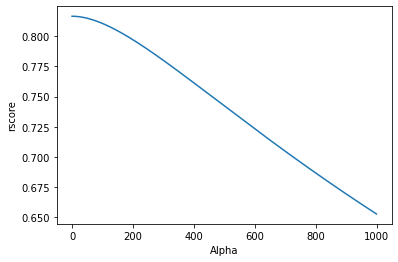

<Figure size 432x288 with 0 Axes>

In [66]:
# Making a plot of the rscore of each alpha from 0 to 1000
import matplotlib.pyplot as plt
plt.plot(rscore)
plt.xlabel("Alpha")
plt.ylabel("rscore")
plt.show()
plt.clf()

In [67]:
# Using the optimum alpha for developing the model
ridge_reg = Ridge(alpha=rscore.argmax())
ridge_reg.fit(X_train,y_train)
yhat = ridge_reg.predict(X_train)
r2_score(y_train, yhat)

0.816713841145128

In [68]:
yhat_test = ridge_reg.predict(X_test)
r2_score(y_test, yhat_test)

0.8596505091170814

In [69]:
# Determining the mean squared loss of the model
mean_squared_error(y_test, yhat_test)

438106306.9830401

In [70]:
ridge_reg_weights = get_weights_df(ridge_reg, XX, 'ridge_reg_Weight_lower_salary','ridge_reg_Weight_upper_salary' )
ridge_reg_weights

,Features,ridge_reg_Weight_lower_salary,ridge_reg_Weight_upper_salary
0,eligibility,-1633.740085,-2365.111832
1,contract_type,-634.337002,-1091.595804
2,SQL,0.000000,0.000000
3,CSS,0.000000,0.000000
4,HTML,0.000000,0.000000
5,BA,0.000000,0.000000
6,Java,0.000000,0.000000
7,Vi,0.000000,0.000000
8,ML,0.000000,0.000000
9,Machine Learning,0.000000,0.000000


In [71]:
# Determing the optimum alpha for the lasso regression model
from sklearn.linear_model import Lasso
rscore = []
for alpha in range(5000):
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)
    yhat = lasso_reg.predict(X_train)
    rscore_ = r2_score(y_train, yhat)
    rscore.append(rscore_)
rscore = np.array(rscore)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.381e+11, tolerance: 2.620e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, po

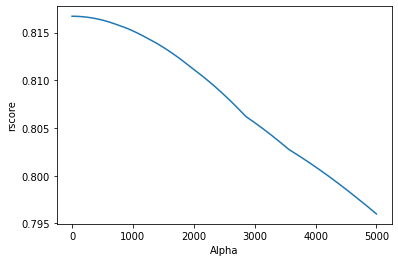

<Figure size 432x288 with 0 Axes>

In [72]:
# Making a plot of the rscore of each alpha from 0 to 5000
plt.plot(rscore)
plt.xlabel("Alpha")
plt.ylabel("rscore")
plt.show()
plt.clf()

In [73]:
lasso_reg = Lasso(alpha=rscore.argmax())
lasso_reg.fit(X_train, y_train)
yhat = lasso_reg.predict(X_train)
r2_score(y_train, yhat)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.381e+11, tolerance: 2.620e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, po

0.816713841145128

In [74]:
yhat_test = lasso_reg.predict(X_test)
r2_score(y_test, yhat_test)

0.8596505091170815

In [75]:
mean_squared_error(y_test, yhat_test)

438106306.98303974

In [76]:
lasso_reg_weights = get_weights_df(lasso_reg, XX, 'lasso_reg_Weight_lower_salary','lasso_reg_Weight_upper_salary' )
lasso_reg_weights

,Features,lasso_reg_Weight_lower_salary,lasso_reg_Weight_upper_salary
0,eligibility,-1633.740085,-2365.111832
1,contract_type,-634.337002,-1091.595804
2,SQL,0.000000,0.000000
3,CSS,0.000000,0.000000
4,HTML,0.000000,0.000000
5,BA,0.000000,0.000000
6,Java,0.000000,0.000000
7,Vi,0.000000,0.000000
8,ML,0.000000,0.000000
9,Machine Learning,0.000000,0.000000


In [77]:
X_test2 = df_test.drop(["lower_salary", "upper_salary"], axis="columns").reset_index(drop = True)

In [78]:
X_test2.head()

,title scraped for,Country,Position,year_of_exp,contract_type,eligibility,D,C,R,AWS,...,Excel,Machine Learning,ML,Vi,Java,BA,HTML,CSS,client,PowerPoint
0,3,0,2,8.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,2,7.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,1,4.0,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,2,8.0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,0,2,6.0,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Train set: (3416, 25) (3416, 2)
Test set: (854, 25) (854, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.002e+12, tolerance: 7.595e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, posi

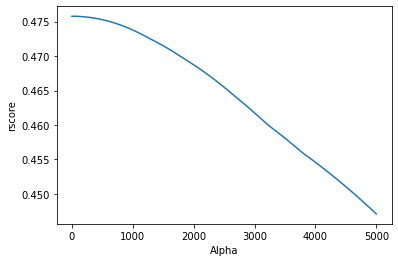

<Figure size 432x288 with 0 Axes>

In [79]:
yhat = lasso_reg.predict(X_test2)
X_test2[["lower_salary", "upper_salary"]] = 0

for i in range(X_test2.shape[0]):
    X_test2.loc[i,["lower_salary", "upper_salary"]] = yhat[i]
  #X_test2.loc(i,"upper_salary") = yhat[i][1]
    i +=1

df3 = pd.concat([df2, X_test2])

# Extracting the features and target variable
y = df3[["lower_salary", "upper_salary"]].values
X = df3.drop(["lower_salary", "upper_salary"], axis="columns")

# Normalizing the data
X= StandardScaler().fit(X).transform(X)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.linear_model import Lasso
rscore = []
for alpha in range(5000):
    lasso_reg_2 = Lasso(alpha=alpha)
    lasso_reg_2.fit(X_train, y_train)
    yhat = lasso_reg_2.predict(X_train)
    rscore_ = r2_score(y_train, yhat)
    rscore.append(rscore_)
rscore = np.array(rscore)

# Making a plot of the rscore of each alpha from 0 to 5000
plt.plot(rscore)
plt.xlabel("Alpha")
plt.ylabel("rscore")
plt.show()
plt.clf()

In [80]:
lasso_reg_weights_2 = get_weights_df(lasso_reg_2, XX, 'lasso_reg_Weight_lower_salary','lasso_reg_Weight_upper_salary' )
lasso_reg_weights_2

,Features,lasso_reg_Weight_lower_salary,lasso_reg_Weight_upper_salary
0,title scraped for,-0.000000,-0.000000
1,CSS,0.000000,0.000000
2,HTML,0.000000,0.000000
3,BA,0.000000,0.000000
4,Java,0.000000,0.000000
5,Vi,0.000000,0.000000
6,ML,0.000000,0.000000
7,Machine Learning,0.000000,0.000000
8,Excel,0.000000,0.000000
9,Python,0.000000,0.000000


In [ ]:
import pickle
filename = 'secondmodel.pkl'
pickle.dump(lasso_reg, open(filename, 'wb'))